# Chapter 6. AI 기초 - 시계열 분석

# sktime

## Library

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Data

In [2]:
from sktime.datasets import load_airline

In [3]:
Y = load_airline()
Y

Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
           ...  
1960-08    606.0
1960-09    508.0
1960-10    461.0
1960-11    390.0
1960-12    432.0
Freq: M, Name: Number of airline passengers, Length: 144, dtype: float64

In [4]:
Y.index = Y.index.to_timestamp()

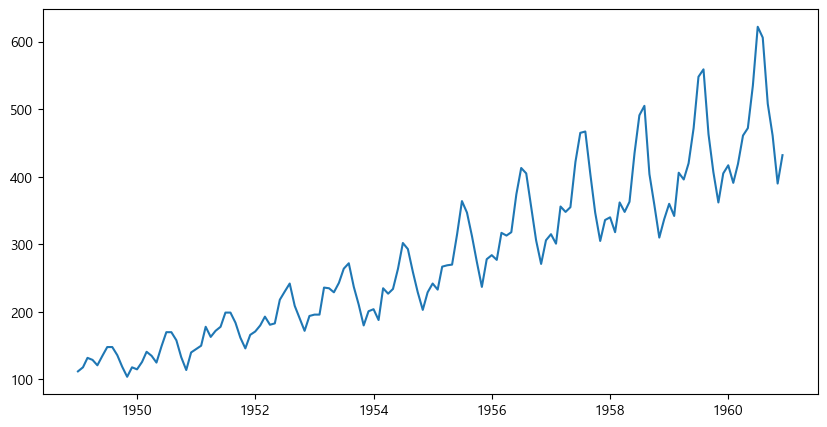

In [5]:
plt.figure(figsize= (10,5))

plt.plot(Y)

plt.show()

## Data Split

In [6]:
from sktime.forecasting.model_selection import temporal_train_test_split

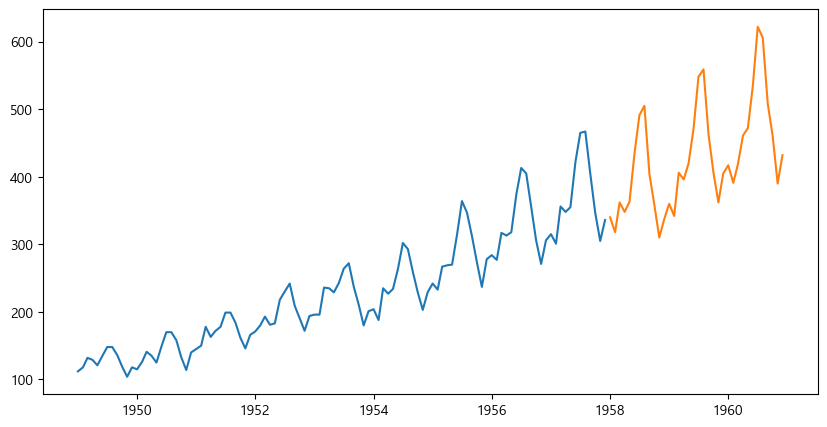

In [7]:
Y_train, Y_test = temporal_train_test_split(Y)

plt.figure(figsize= (10,5))

plt.plot(Y_train)
plt.plot(Y_test)

plt.show()

## Modeling

In [8]:
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.theta import ThetaForecaster

<Axes: xlabel='Period'>

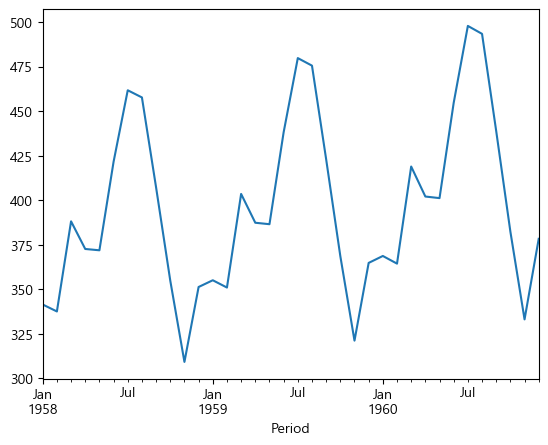

In [9]:
Y = load_airline()
Y_train, Y_test = temporal_train_test_split(Y)

# 예측하고자 하는 대상을 포장
Y_fh = ForecastingHorizon(Y_test.index, is_relative= False)
tfc = ThetaForecaster(sp= 12)
tfc.fit(Y_train)
pred = tfc.predict(Y_fh)
pred.plot()

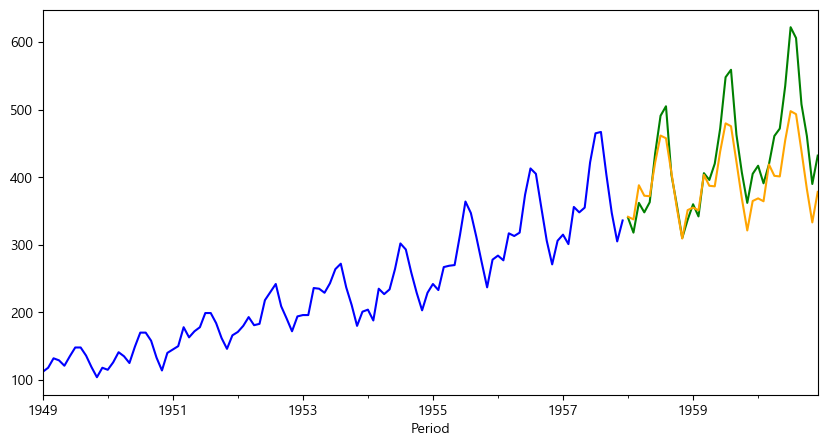

In [10]:
plt.figure(figsize= (10,5))

Y_train.plot(color= 'b')
Y_test.plot(color= 'g')
pred.plot(color= 'orange')

plt.show()

## Evaluation

In [11]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

In [12]:
mean_absolute_percentage_error(Y_test, pred).round(4)

0.0817

# Time Series Classification

## Data

In [13]:
from sktime.datasets import load_arrow_head

In [14]:
X, Y = load_arrow_head()

## Data Split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size= 0.2,
                                                    random_state= 1)

In [17]:
X_train.iloc[0]

dim_0    0     -2.200299
1     -2.184525
2     -2.15325...
Name: 152, dtype: object

In [18]:
Y_train[0]

'1'

## Modeling

In [19]:
from sktime.classification.interval_based import TimeSeriesForestClassifier

In [20]:
tsfc = TimeSeriesForestClassifier()
tsfc.fit(X_train, Y_train)
pred = tsfc.predict(X_test)

## Evaluation

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(Y_test, pred).round(4)

0.9302

# Time Series Clustering

## Data

In [23]:
X, Y = load_arrow_head()

## Modeling

In [24]:
from sktime.clustering.k_means import TimeSeriesKMeans

In [25]:
tskm = TimeSeriesKMeans(n_clusters= 5, init_algorithm= 'forgy', metric= 'dtw')
tskm.fit(X_train)

TimeSeriesKMeans(init_algorithm='forgy', n_clusters=5)

## Result

In [26]:
from sktime.clustering.utils.plotting._plot_partitions import plot_cluster_algorithm

<Figure size 500x1000 with 0 Axes>

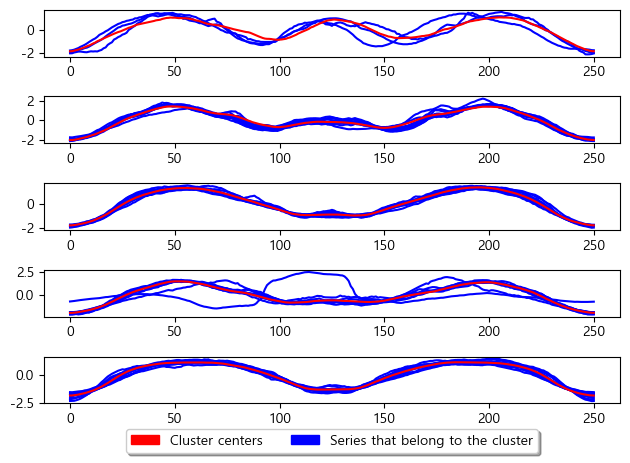

In [27]:
plot_cluster_algorithm(tskm, X_test, tskm.n_clusters)